In [1]:
%pylab inline
import time 

Populating the interactive namespace from numpy and matplotlib


In [2]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=int)
Y = np.array(([75], [82], [93]), dtype=int)


In [3]:
X

array([[ 3,  5],
       [ 5,  1],
       [10,  2]])

In [4]:
Y

array([[75],
       [82],
       [93]])

In [5]:
X = X/24
Y = Y/100


In [6]:
X

Y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [136]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of Sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self,X,Y):
        self.yHat = self.forward(X)
        J = 0.5*sum((Y-self.yHat)**2)
        return J 
    
    def costFunctionPrime(self, X, Y):
        #Compute derivative with respect to W and W2
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(Y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T,delta2)
        
        return dJdW1, dJdW2

    #Helper Functions for interacting with other classes
    def getParams(self):
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, Y):
        dJdW1, dJdW2 = self.costFunctionPrime(X,Y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
        

In [8]:
X

array([[ 0.125     ,  0.20833333],
       [ 0.20833333,  0.04166667],
       [ 0.41666667,  0.08333333]])

In [35]:
NN = Neural_Network()

In [36]:
PredictedScores = NN.forward(X)

In [37]:
PredictedScores

array([[ 0.46827286],
       [ 0.46183416],
       [ 0.44528785]])

In [12]:
Y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

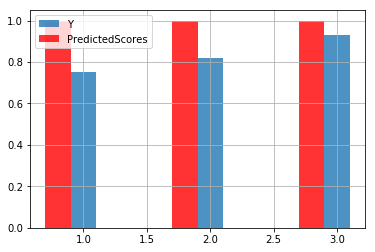

In [84]:
#Compare estimate, yHat, to actually score
bar([1,2,3], Y, width = 0.2, alpha=0.8)
bar([.8,1.8,2.8],yHat, width = 0.2, color='r', alpha=0.8)
grid(1)
legend(['Y', 'PredictedScores'])

In [16]:
def sigmoidPrime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

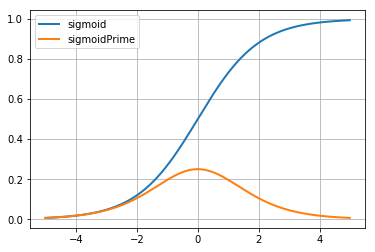

In [22]:
testValues = np.arange(-5,5,0.01)
plot(testValues, sigmoid(testValues),linewidth = 2)
plot((testValues), sigmoidPrime(testValues), linewidth = 2)
grid(1)
legend(['sigmoid','sigmoidPrime'])

In [39]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,Y)

In [40]:
dJdW1

array([[ 0.02027004, -0.01808426,  0.00198904],
       [ 0.0074184 , -0.00674439,  0.00074155]])

In [41]:
dJdW2

array([[-0.134321  ],
       [-0.11120944],
       [-0.1667311 ]])

In [120]:
scalar = 3 
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,Y)

In [49]:
cost1 = NN.costFunction(X,Y)

In [121]:
cost2

0.0088779121325049809

In [94]:
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X,Y)

In [95]:
cost3

0.049871013369549841

In [125]:
yHat = NN.forward(X) 

In [126]:
yHat

array([[ 0.84928086],
       [ 0.85067496],
       [ 0.84658429]])

In [128]:
def f(x):
    return x**2

In [133]:
h = 1e-4
x = 1.5

In [134]:
numericalGradient = (f(x+h)-f(x-h))/(2*h)

In [135]:
numericalGradient

2.9999999999996696

In [143]:
def computeNumericalGradient(N, X, Y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4
    
    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X,Y)
        
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X,Y)
        
        #compute Numerical Gradient
        numgrad[p] = (loss2-loss1) / (2*e)
        
        #Return the value we changed to zero:
        perturb[p] = 0
        
    #Return Params to original value:
    N.setParams(paramsInitial)
    
    return numgrad
        

In [173]:
NN = Neural_Network()

In [145]:
numgrad = computeNumericalGradient(NN, X, Y)
numgrad

array([ 0.04271968, -0.02681878,  0.02019849,  0.01652774, -0.01038629,
        0.00797213, -0.16691571, -0.16498421, -0.1215724 ])

In [146]:
grad = NN.computeGradients(X,Y)
grad

array([ 0.04271968, -0.02681878,  0.02019849,  0.01652774, -0.01038629,
        0.00797213, -0.16691571, -0.16498421, -0.1215724 ])

In [147]:
norm(grad-numgrad)/norm(grad+numgrad)

1.4553167167504553e-10

In [148]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,Y)

In [162]:
Costs = np.arange(1000)

for i in range(0,1000):
    NN.W1 = NN.W1 - dJdW1
    NN.W2 = NN.W2 - dJdW2
    Costs[i] = NN.costFunction(X,Y)

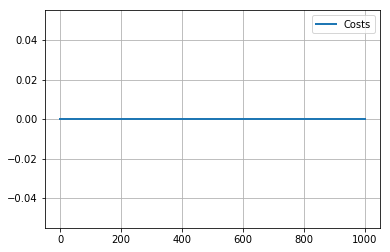

In [163]:
testValues = np.arange(0,1000,1)
plot(testValues, Costs,linewidth = 2)
grid(1)
legend(['Costs'])

In [164]:
Costs[0]

0

In [ ]:
cost = np.arange(1000)

for i in range(0,1000):
    NN.W1 = NN.W1 - 5*dJdW1
    NN.W2 = NN.W2 - 5*dJdW2
    cost[i] = NN.costFunction(X,Y)*1000
costs = NN.costFunction(X,Y)

In [209]:
costs

0.0499

array([[ 0.81182902],
       [ 0.81125907],
       [ 0.78801742]])

In [3]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        
    def costFunctionWrapper(self, param, X, Y):
        self.N.setParams(params)
        cost = self.N.costFunction(X,Y)
        grad = self.N.computeGradients(X,Y)
        
        return cost, grad
    
    def train(self, X, Y):
        #Make an internal variable for the callback function:
        self.X = X
        self.Y = Y
        
        #Make empty list to store cost:
        self.J = []
        
        params0 = self.N.getParams()
        
        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res